
___
# Chapter 2 -  Machine Learning Based Recommendation Systems
## Segment 1 - Classification-based Collaborative Filtering Systems
## Logistic Regression as a Classifier

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


This bank marketing dataset is open-sourced and available for download at the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#).

It was originally created by: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

You can see the link here and a citation to the original source. 

Although the raw data is available from UCI it needed some transformation before we could use it with the logistic regression classifier. 


To transform it I converted categorical text variables to binary categorical dummy variables and saved the transformed version as a csv file

In [2]:
bank_full = pd.read_csv('bank_full_w_dummy_vars.csv')
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unknown,job_retired,job_services,job_self_employed,job_unemployed,job_maid,job_student,married,single,divorced
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,0,0,0,0,0,0,0,1,1


This left side of the dataset is the original data I downloaded from UCI, and then on the right side you can see some dummy variables I created. 

In [3]:
# Let's get a better description of the dataset by using the info() method. 
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       45211 non-null  int64 
 1   job                       45211 non-null  object
 2   marital                   45211 non-null  object
 3   education                 45211 non-null  object
 4   default                   45211 non-null  object
 5   balance                   45211 non-null  int64 
 6   housing                   45211 non-null  object
 7   loan                      45211 non-null  object
 8   contact                   45211 non-null  object
 9   day                       45211 non-null  int64 
 10  month                     45211 non-null  object
 11  duration                  45211 non-null  int64 
 12  campaign                  45211 non-null  int64 
 13  pdays                     45211 non-null  int64 
 14  previous              

And again, you can see here the original variables in the dataset. 

The y_binary is a binary version of our target variable. 

And then down here you're going to see all of the dummy variables I created to represent the information that is contained in the first few records of the dataset. 

We're going to use the y_binary variable to train our model and predict whether new users, will subscribe based on their user attributes.

In [4]:
bank_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'y_binary', 'housing_loan',
       'credit_in_default', 'personal_loans', 'prev_failed_to_subscribe',
       'prev_subscribed', 'job_management', 'job_tech', 'job_entrepreneur',
       'job_bluecollar', 'job_unknown', 'job_retired', 'job_services',
       'job_self_employed', 'job_unemployed', 'job_maid', 'job_student',
       'married', 'single', 'divorced'],
      dtype='object')

In [5]:
bank_full.isna().sum()

age                         0
job                         0
marital                     0
education                   0
default                     0
balance                     0
housing                     0
loan                        0
contact                     0
day                         0
month                       0
duration                    0
campaign                    0
pdays                       0
previous                    0
poutcome                    0
y                           0
y_binary                    0
housing_loan                0
credit_in_default           0
personal_loans              0
prev_failed_to_subscribe    0
prev_subscribed             0
job_management              0
job_tech                    0
job_entrepreneur            0
job_bluecollar              0
job_unknown                 0
job_retired                 0
job_services                0
job_self_employed           0
job_unemployed              0
job_maid                    0
job_studen

In [6]:
# Assuming your dataset is stored in a variable called "data"
subset_columns = bank_full.columns[18:37]  # Select columns 18 to 36
subset_data = bank_full[subset_columns]  # Subset the data using the selected columns
subset_data.head()

,housing_loan,credit_in_default,personal_loans,prev_failed_to_subscribe,prev_subscribed,job_management,job_tech,job_entrepreneur,job_bluecollar,job_unknown,job_retired,job_services,job_self_employed,job_unemployed,job_maid,job_student,married,single,divorced
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1


In [44]:
from sklearn.model_selection import train_test_split

# Extract the features (X) and the target variable (y)
X = subset_data  # Features
y = bank_full['y_binary']  # Target variable

# Split the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [45]:
X_train.shape

(31647, 19)

In [46]:
y_train.shape

(31647,)

In [47]:
X_test.shape

(13564, 19)

In [48]:
y_test.shape

(13564,)

In [49]:
from sklearn.linear_model import LogisticRegression

LogisticReg = LogisticRegression()
LogisticReg.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred = LogisticReg.predict(X_test)

In [51]:
y_pred.shape

(13564,)

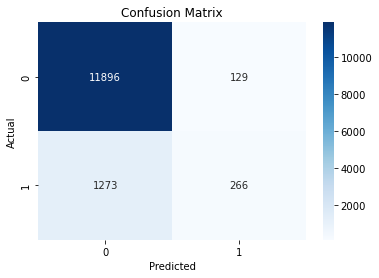

In [52]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.896638159834857
Precision: 0.6734177215189874
Recall: 0.1728395061728395
F1 Score: 0.2750775594622544
